# Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%y').date()

# Load Dataset 

In [4]:
data=pd.read_excel("C:\\Users\DELL\Desktop\Rubixe projects\Feb2020\service-data.xlsx",header=0,date_parser='Job_Card_Date')
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [5]:
data.describe() 

,Current_KM_Reading
count,28482.000000
mean,19348.003827
std,25246.722306
min,0.000000
25%,3988.000000
50%,12420.500000
75%,27905.000000
max,610112.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28482 non-null  datetime64[ns]
 1   Job_Card_Date          28482 non-null  datetime64[ns]
 2   Business_Partner_Name  28484 non-null  object        
 3   Vehicle_No             28484 non-null  object        
 4   Vehicle_Model          28482 non-null  object        
 5   Current_KM_Reading     28482 non-null  float64       
 6   INVOICE_LINE_TEXT      28449 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


In [7]:
data_filter= data[(data['INVOICE_LINE_TEXT']=='SWITCH')]
data_filter

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
311,2017-06-07,2017-06-07,santXXXXXXXXXX,KA27V8XXXX,BAJAJ PULSAR 150,56230.0,SWITCH
2416,2017-07-28,2017-07-28,pravXXXXXXXXXX,KA03EPXXXX,BAJAJ PULSAR 150,31618.0,SWITCH
2419,2017-07-28,2017-07-28,pravXXXXXXXXXX,KA03EPXXXX,BAJAJ PULSAR 150,31618.0,SWITCH
2561,2017-08-01,2017-08-01,ANOOXXXXXXXXXX,KA19EHXXXX,BAJAJ AVENGER STREET 220,9514.0,SWITCH
3702,2017-09-04,2017-09-04,rambXXXXXXXXXX,KA03EZXXXX,BAJAJ PULSAR 150,55172.0,SWITCH
3704,2017-09-04,2017-09-04,rambXXXXXXXXXX,KA03EZXXXX,BAJAJ PULSAR 150,55172.0,SWITCH
3920,2017-09-08,2017-09-08,santXXXXXXXXXX,KA53EPXXXX,BAJAJ V,24906.0,SWITCH
4087,2017-09-14,2017-09-14,satiXXXXXXXXXX,KA53ERXXXX,BAJAJ PULSAR 220,11164.0,SWITCH
4567,2017-09-25,2017-09-25,RAJUXXXXXXXXXX,KA53EMXXXX,BAJAJ PULSAR 220,9902.0,SWITCH
4655,2017-09-26,2017-09-26,jai XXXXXXXXXX,KA05HEXXXX,BAJAJ PULSAR 150,41671.0,SWITCH


# Checking for the outliers

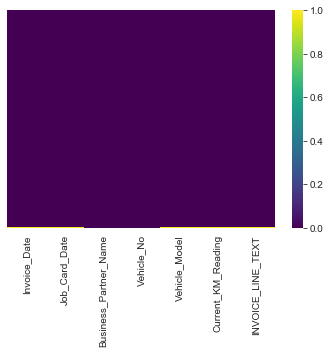

In [8]:
import seaborn as sns
sns.set_style('whitegrid')
sns.heatmap(data.isnull(),cbar=True,yticklabels=False,cmap='viridis')

# Create Orders on demand column in the DataFrame

In [9]:
data.loc[data.INVOICE_LINE_TEXT!=0,'Orders_on_Demand']=1
data.head(4)

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0


# Find difference of days between job card date and invoice date

In [10]:
data['date_difference']=data['Invoice_Date']-data['Job_Card_Date']

In [11]:
data.head()

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0 days
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2 days
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2 days
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2 days
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2 days


In [12]:
Counter(data.date_difference)

Counter({Timedelta('0 days 00:00:00'): 28066,
         Timedelta('2 days 00:00:00'): 23,
         Timedelta('3 days 00:00:00'): 83,
         Timedelta('4 days 00:00:00'): 16,
         Timedelta('1 days 00:00:00'): 233,
         Timedelta('5 days 00:00:00'): 47,
         Timedelta('19 days 00:00:00'): 7,
         Timedelta('16 days 00:00:00'): 2,
         Timedelta('-1 days +00:00:00'): 5,
         NaT: 2})

In [13]:
data[data.date_difference =='19 days']

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference
8435,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,CHAIN LUBRICATION,1.0,19 days
8436,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,SEAT COVER,1.0,19 days
8437,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,TANK COVER,1.0,19 days
8438,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,ENGINE OIL,1.0,19 days
8439,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,AIR FILTER,1.0,19 days
8440,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,BRAKE SHOE,1.0,19 days
8441,2018-01-17,2017-12-29,somnXXXXXXXXXX,KA04ELXXXX,BAJAJ CT 100,85349.0,WHEEL RUBBER,1.0,19 days


# Check for EDA steps

In [14]:
data.shape #For checking the shape of the data

(28484, 9)

In [15]:
Counter(data.INVOICE_LINE_TEXT) #To count the number of each spare part

Counter({'ENGINE OIL': 3802,
         'POLISH': 1245,
         'CONSUMABLES': 1595,
         'COOLANT OIL': 70,
         'CHAIN LUBRICATION': 3441,
         '4 WAY SWITCH': 2,
         '3M OIL': 1628,
         'GENERAL SERVICE': 2142,
         'OIL FILTER': 821,
         'INDICATOR': 110,
         'HEAD REST': 56,
         'VALVE GUIDE': 63,
         'TIMMING CHAIN': 78,
         'FOOT REST': 99,
         'LOW BEAM BULB': 12,
         'VALVE GRAINDING': 63,
         'DISC PAD': 575,
         'LOADING GEAR': 53,
         'PACKING KIT': 56,
         'TIMMING CHAIN PAD': 73,
         'TENSIONER': 79,
         'CLUTCH BELL REST': 21,
         'CLUTCH ASSEMBLY': 212,
         'VALVE KIT': 66,
         'SPARK PLUG': 421,
         'ONE WAY CLUTCH': 5,
         'BORE KIT': 53,
         'AIR FILTER': 1715,
         'HEAD RUBBER': 18,
         'CLUTCH CABLE': 263,
         'CRANK SHAFT': 50,
         'BRAKE ADJUSTMENT': 7,
         'BRAKE SHOE': 965,
         'AIR FILTER CHECKUP': 467,
         

In [16]:
data.head() 

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0 days
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2 days
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2 days
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2 days
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2 days


In [17]:
data.isnull().sum().to_frame() # To check for the null values in the data

,0
Invoice_Date,2
Job_Card_Date,2
Business_Partner_Name,0
Vehicle_No,0
Vehicle_Model,2
Current_KM_Reading,2
INVOICE_LINE_TEXT,35
Orders_on_Demand,0
date_difference,2


In [18]:
data.dropna(axis=0,inplace=True) # To drop all the null values present in the data

In [19]:
data.isnull().sum().to_frame()

,0
Invoice_Date,0
Job_Card_Date,0
Business_Partner_Name,0
Vehicle_No,0
Vehicle_Model,0
Current_KM_Reading,0
INVOICE_LINE_TEXT,0
Orders_on_Demand,0
date_difference,0


# Convert argument to datetime

In [20]:
data['Job_Card_Date']=pd.to_datetime(data['Job_Card_Date'])

In [21]:
type(data['Job_Card_Date'].iloc[0]) # Check the type 

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
data['Job_Card_Date'] # Display the details of Job Card Date

0       2017-05-30
1       2017-05-31
2       2017-05-31
3       2017-05-31
4       2017-05-31
           ...    
28477   2019-01-06
28478   2019-01-06
28479   2019-01-06
28480   2019-01-06
28481   2019-01-06
Name: Job_Card_Date, Length: 28448, dtype: datetime64[ns]

# Split the data using DatetimeIndex function

In [23]:
data['Year'] = pd.DatetimeIndex(data['Job_Card_Date']).year # To separate year from the job card date
data['Month'] = pd.DatetimeIndex(data['Job_Card_Date']).month # To separate month from the job card dates

In [24]:
data.groupby('INVOICE_LINE_TEXT').count() # Count the value of each spare part and group them

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,Orders_on_Demand,date_difference,Year,Month
INVOICE_LINE_TEXT,,,,,,,,,,
10 SIZE NUT,2,2,2,2,2,2,2,2,2,2
12 SIZE BOLT,2,2,2,2,2,2,2,2,2,2
3M OIL,1628,1628,1628,1628,1628,1628,1628,1628,1628,1628
4 WAY SWITCH,2,2,2,2,2,2,2,2,2,2
6004 BEARING,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
YOKE SET,1,1,1,1,1,1,1,1,1,1
bore kit,3,3,3,3,3,3,3,3,3,3
clutch cable,72,72,72,72,72,72,72,72,72,72


In [25]:
data

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference,Year,Month
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0 days,2017,5
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2 days,2017,5
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2 days,2017,5
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2 days,2017,5
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2 days,2017,5
...,...,...,...,...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER,1.0,0 days,2019,1
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE,1.0,0 days,2019,1
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER,1.0,0 days,2019,1
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL,1.0,0 days,2019,1


In [26]:
x=data.date_difference.astype(str)
print(x[:2])
data['date_difference']=[int(x[:2])\
                   for x in data.date_difference.astype(str)]
data

0    0 days 00:00:00.000000000
1    2 days 00:00:00.000000000
Name: date_difference, dtype: object


,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference,Year,Month
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL,1.0,0,2017,5
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL,1.0,2,2017,5
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH,1.0,2,2017,5
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES,1.0,2,2017,5
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL,1.0,2,2017,5
...,...,...,...,...,...,...,...,...,...,...,...
28477,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,SPROCKET RUBBER,1.0,0,2019,1
28478,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,CLUTCH CABLE,1.0,0,2019,1
28479,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,OIL FILTER,1.0,0,2019,1
28480,2019-01-06,2019-01-06,pravXXXXXXXXXX,KA53EVXXXX,BAJAJ DISCOVER 125,12805.0,DISC OIL,1.0,0,2019,1


In [27]:
data[data.date_difference==16]

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT,Orders_on_Demand,date_difference,Year,Month
9754,2018-02-21,2018-02-05,jagaXXXXXXXXXX,AP27ARXXXX,BAJAJ PULSAR 220,0.0,HEAD LIGHT DOOM,1.0,16,2018,2
9755,2018-02-21,2018-02-05,jagaXXXXXXXXXX,AP27ARXXXX,BAJAJ PULSAR 220,0.0,LABOUR,1.0,16,2018,2


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28448 non-null  datetime64[ns]
 1   Job_Card_Date          28448 non-null  datetime64[ns]
 2   Business_Partner_Name  28448 non-null  object        
 3   Vehicle_No             28448 non-null  object        
 4   Vehicle_Model          28448 non-null  object        
 5   Current_KM_Reading     28448 non-null  float64       
 6   INVOICE_LINE_TEXT      28448 non-null  object        
 7   Orders_on_Demand       28448 non-null  float64       
 8   date_difference        28448 non-null  int64         
 9   Year                   28448 non-null  int64         
 10  Month                  28448 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 2.6+ MB


In [29]:
data_vehicle_model=data.groupby('Vehicle_Model').sum()

In [30]:
data_vehicle_model.head()

,Current_KM_Reading,Orders_on_Demand,date_difference,Year,Month
Vehicle_Model,,,,,
BAJAJ AVENGER STREET,15193415.0,1111.0,0,2241666,8214
BAJAJ AVENGER STREET 180,205442.0,122.0,0,246196,1133
BAJAJ AVENGER STREET 220,63521043.0,4212.0,145,8498488,32034
BAJAJ BOXER CT,14620.0,4.0,0,8068,24
BAJAJ CALIBER,1495382.0,40.0,0,80694,326


# Finding the Trends

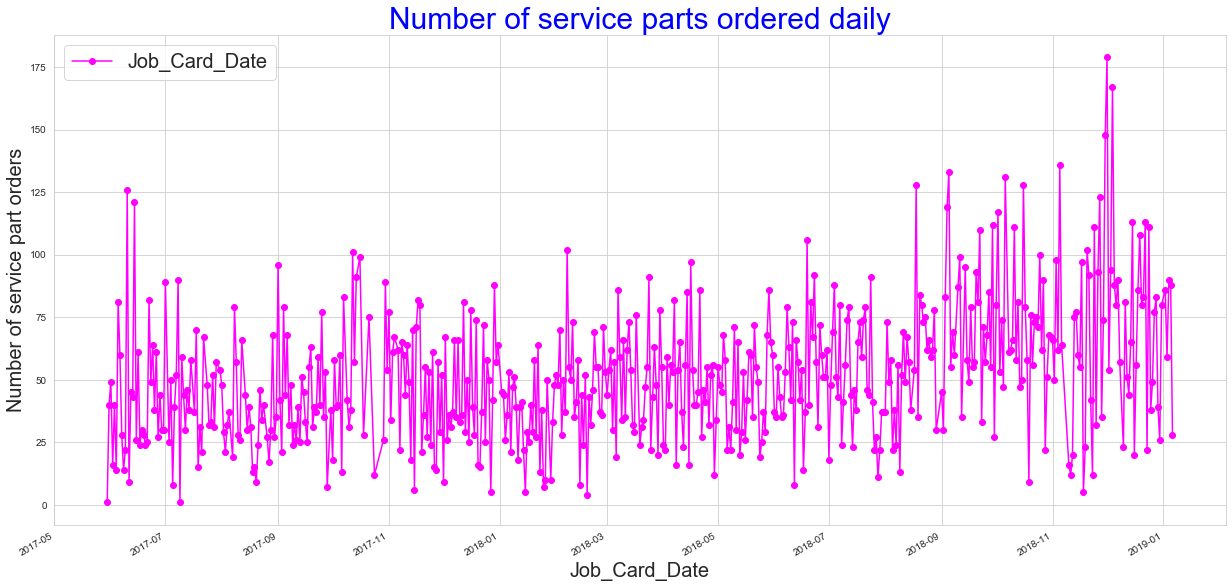

In [31]:
d1=data.groupby(['Job_Card_Date'])['Job_Card_Date'].count().to_frame()
d1.plot(kind='line',figsize=[21,10],color='magenta',marker='o')
plt.title("Number of service parts ordered daily",fontdict={'fontsize':30,'color':'blue'},loc='center')
plt.ylabel("Number of service part orders",fontdict={'fontsize':20})
plt.xlabel("Job_Card_Date",fontdict={'fontsize':20})
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=20)

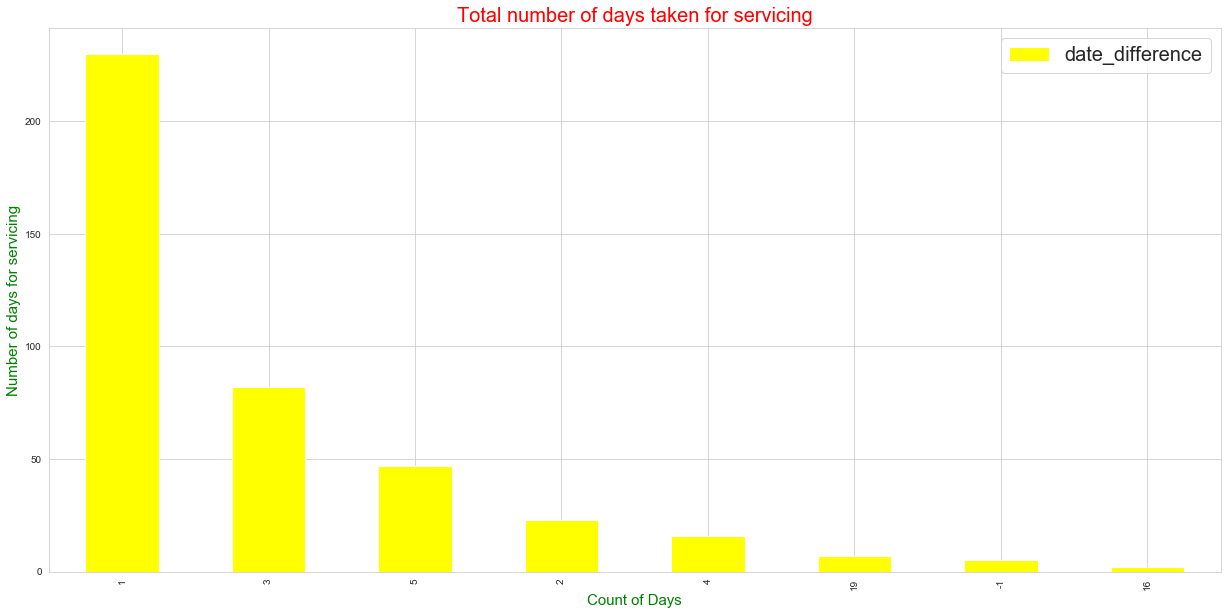

In [32]:
d2=data.date_difference.value_counts()[1:]
d2.plot(kind='bar',figsize=[21,10],color='yellow')
plt.xlabel("Count of Days",fontsize=15,color='green')
plt.ylabel("Number of days for servicing",fontsize=15,color='green')
plt.title("Total number of days taken for servicing",fontdict={'fontsize':20,'color':'red'})
plt.legend(loc='upper right',frameon=True, labelspacing=1,fontsize=20)

Text(0.5, 1.0, 'Most sold service parts')

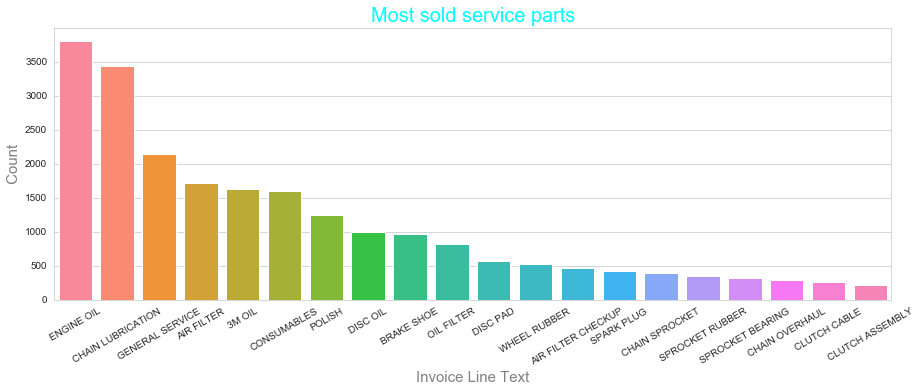

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(data['INVOICE_LINE_TEXT'],order=data['INVOICE_LINE_TEXT'].value_counts().index[:20],saturation=10)
plt.xticks(rotation=30)
plt.xlabel("Invoice Line Text",fontsize=15,color='grey')
plt.ylabel(" Count ",fontsize=15,color='grey')
plt.title("Most sold service parts",fontdict={'fontsize':20,'color':'cyan'})

Text(0.5, 1.0, 'Least sold service parts')

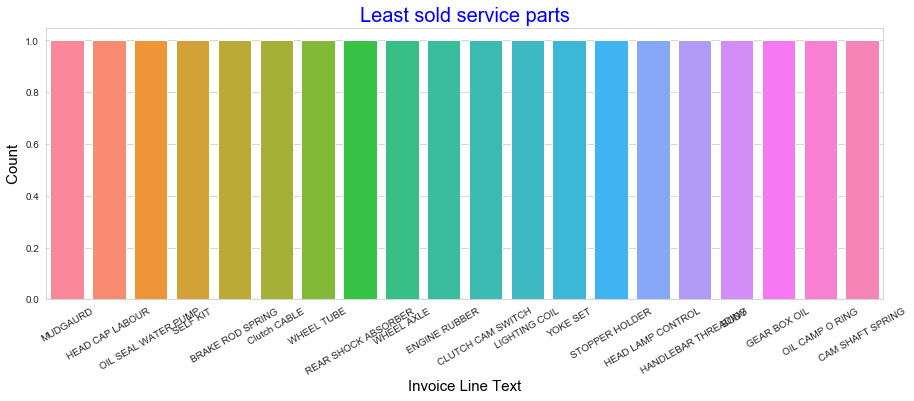

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data['INVOICE_LINE_TEXT'],order=data['INVOICE_LINE_TEXT'].value_counts().index[-20:],saturation=10)
plt.xticks(rotation=30)
plt.xlabel("Invoice Line Text",fontsize=15,color='black')
plt.ylabel(" Count ",fontsize=15,color='black')
plt.title("Least sold service parts",fontdict={'fontsize':20,'color':'blue'})

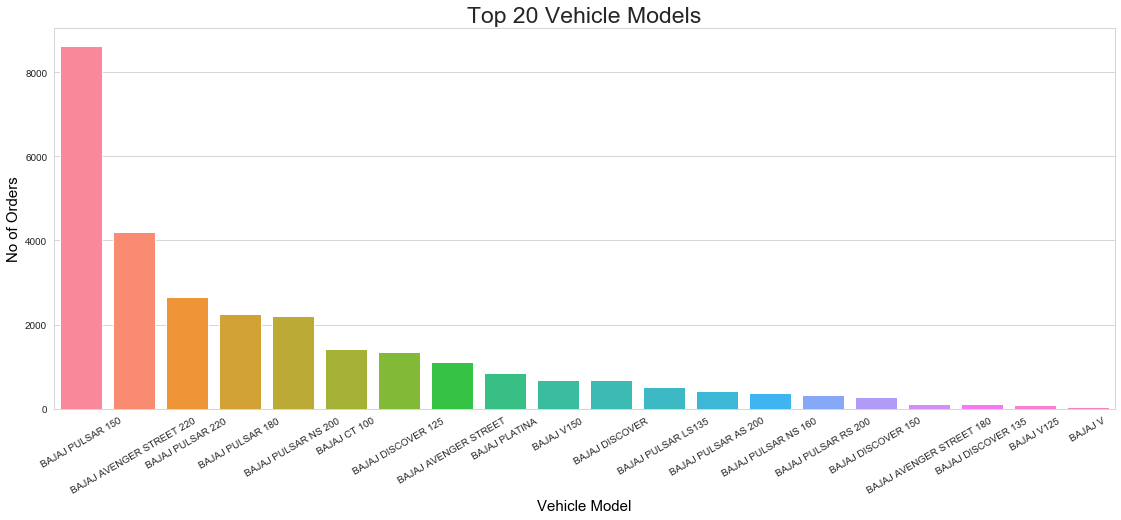

In [35]:
plt.figure(figsize=[19,7])
sns.countplot(data['Vehicle_Model'],order=data['Vehicle_Model'].value_counts().iloc[:20].index,saturation=10)
plt.xlabel("Vehicle Model",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Top 20 Vehicle Models",fontdict={'fontsize':23});

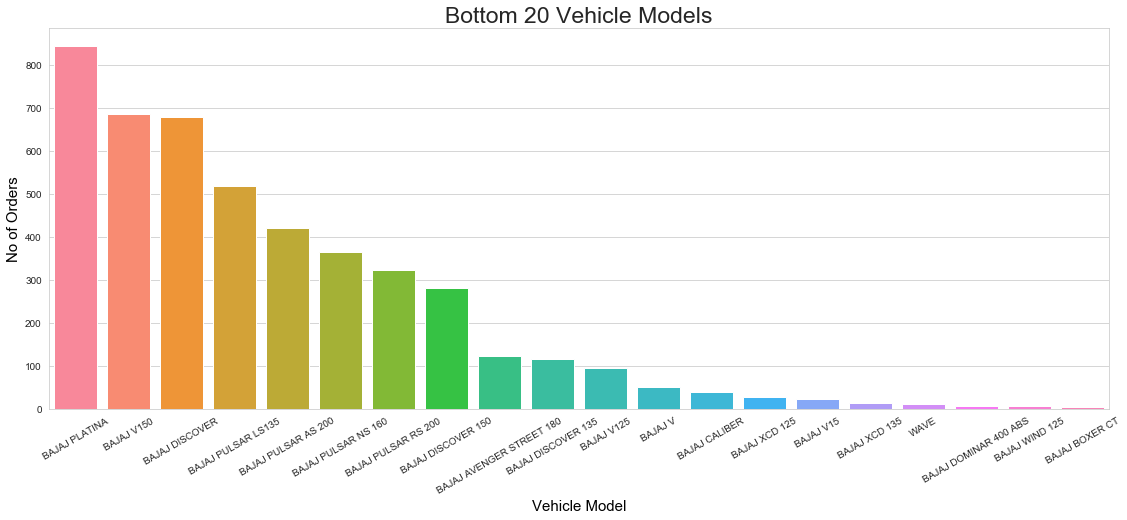

In [36]:
plt.figure(figsize=[19,7])
sns.countplot(data['Vehicle_Model'],order=data['Vehicle_Model'].value_counts().iloc[-20:].index,saturation=10)
plt.xlabel("Vehicle Model",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Bottom 20 Vehicle Models",fontdict={'fontsize':23});

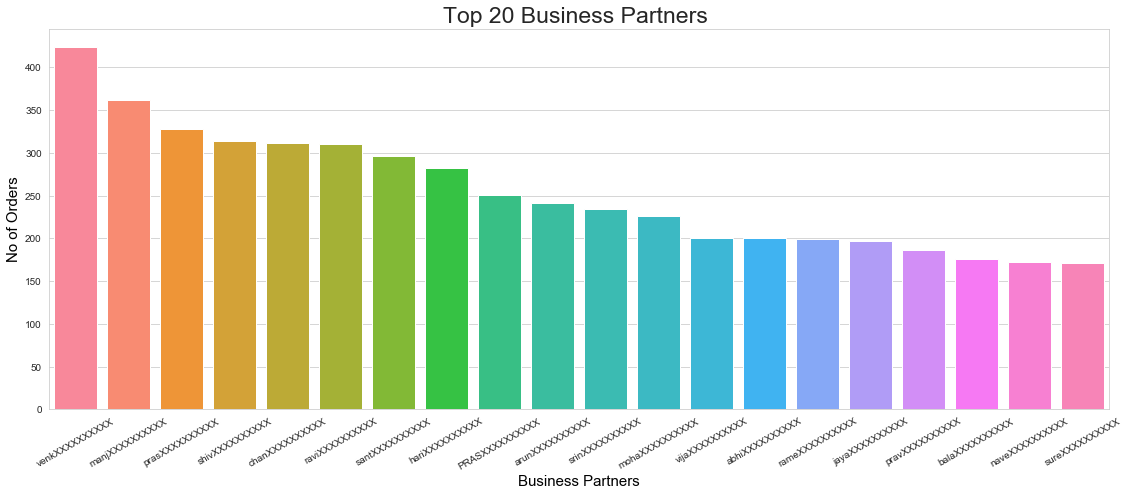

In [37]:
plt.figure(figsize=[19,7])
sns.countplot(data['Business_Partner_Name'],order=data['Business_Partner_Name'].value_counts().iloc[:20].index,saturation=10)
plt.xlabel("Business Partners",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Top 20 Business Partners ",fontdict={'fontsize':23});

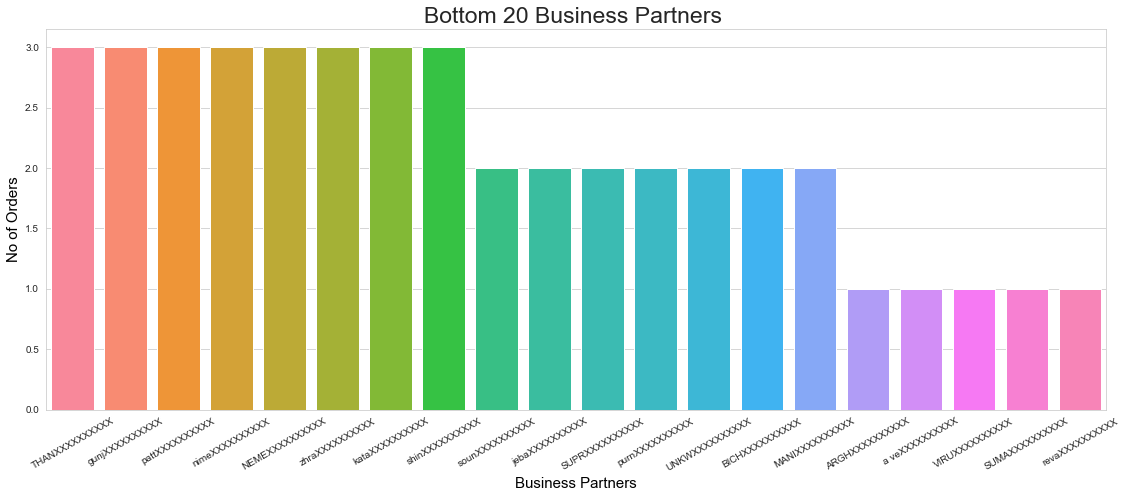

In [38]:
plt.figure(figsize=[19,7])
sns.countplot(data['Business_Partner_Name'],order=data['Business_Partner_Name'].value_counts().iloc[-20:].index,saturation=10)
plt.xlabel("Business Partners",fontdict={'fontsize':15},color='black')
plt.ylabel('No of Orders',fontdict={'fontsize':15},color='black')
plt.xticks(rotation=30)
plt.title("Bottom 20 Business Partners ",fontdict={'fontsize':23});

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice_Date           28448 non-null  datetime64[ns]
 1   Job_Card_Date          28448 non-null  datetime64[ns]
 2   Business_Partner_Name  28448 non-null  object        
 3   Vehicle_No             28448 non-null  object        
 4   Vehicle_Model          28448 non-null  object        
 5   Current_KM_Reading     28448 non-null  float64       
 6   INVOICE_LINE_TEXT      28448 non-null  object        
 7   Orders_on_Demand       28448 non-null  float64       
 8   date_difference        28448 non-null  int64         
 9   Year                   28448 non-null  int64         
 10  Month                  28448 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 3.9+ MB


# Creating a new Dataframe containing Invoice Line Text and Orders on Demand

In [40]:
data_new=data.groupby(data.Job_Card_Date).sum()

In [41]:
data_new.drop(['Current_KM_Reading','date_difference','Year','Month'],axis=1,inplace=True)

In [42]:
data_new

,Orders_on_Demand
Job_Card_Date,
2017-05-30,1.0
2017-05-31,40.0
2017-06-01,49.0
2017-06-02,16.0
2017-06-03,40.0
...,...
2019-01-02,86.0
2019-01-03,59.0
2019-01-04,90.0


In [43]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2017-05-30 to 2019-01-06
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orders_on_Demand  553 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [44]:
data_new.head()

,Orders_on_Demand
Job_Card_Date,
2017-05-30,1.0
2017-05-31,40.0
2017-06-01,49.0
2017-06-02,16.0
2017-06-03,40.0


In [45]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2017-05-30 to 2019-01-06
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Orders_on_Demand  553 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


# Timeseries Forecasting

Text(0.5, 0, 'Job Card Date')

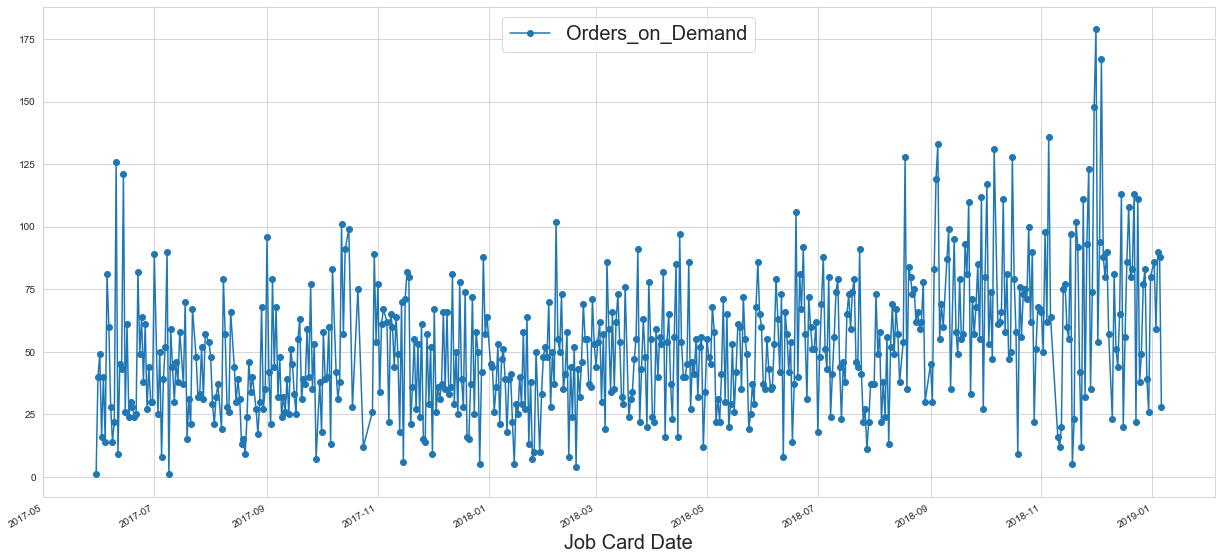

In [46]:
data_new.plot(figsize=(21,10),marker='o')
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Job Card Date',fontdict={'fontsize':20})

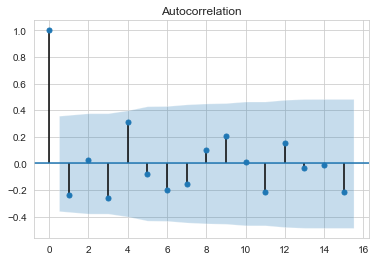

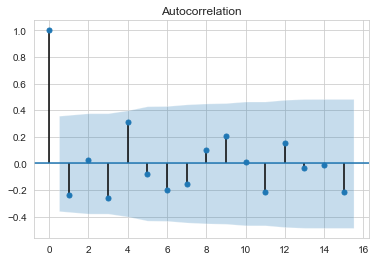

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_new.iloc[:30,:]) # inside iloc :30 means selecting Job Card Date values and : means selecting all the values from Orders on demand

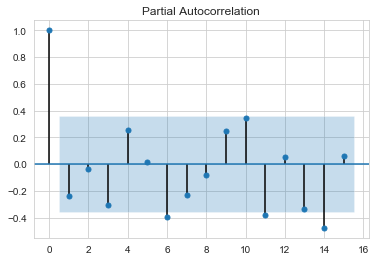

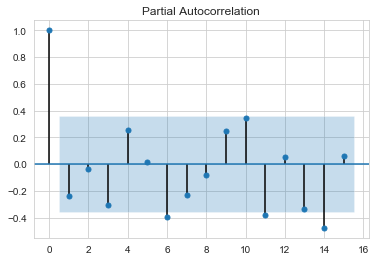

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_new.iloc[:30,:])

# Converting to Stationary

In [49]:
data_diff=data_new.diff(periods=1)

In [50]:
data_diff=data_diff[1:]
data_diff.head()

,Orders_on_Demand
Job_Card_Date,
2017-05-31,39.0
2017-06-01,9.0
2017-06-02,-33.0
2017-06-03,24.0
2017-06-04,-26.0


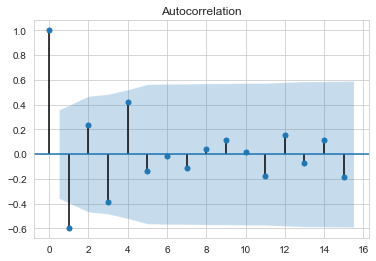

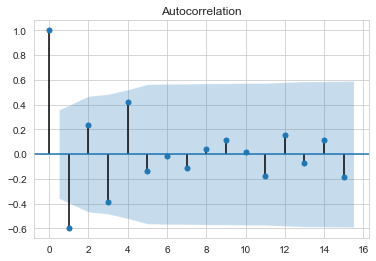

In [51]:
plot_acf(data_diff.iloc[:30,:])

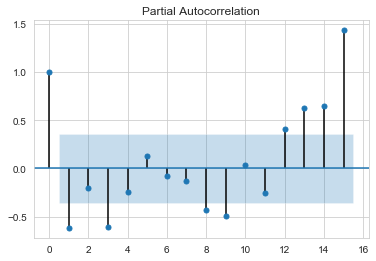

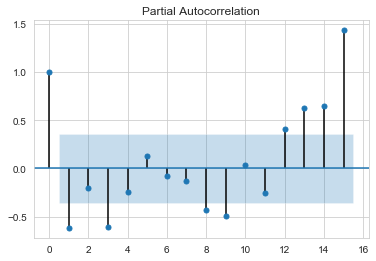

In [52]:
plot_pacf(data_diff.iloc[:30,:])

Text(0.5, 0, 'Job Card Date')

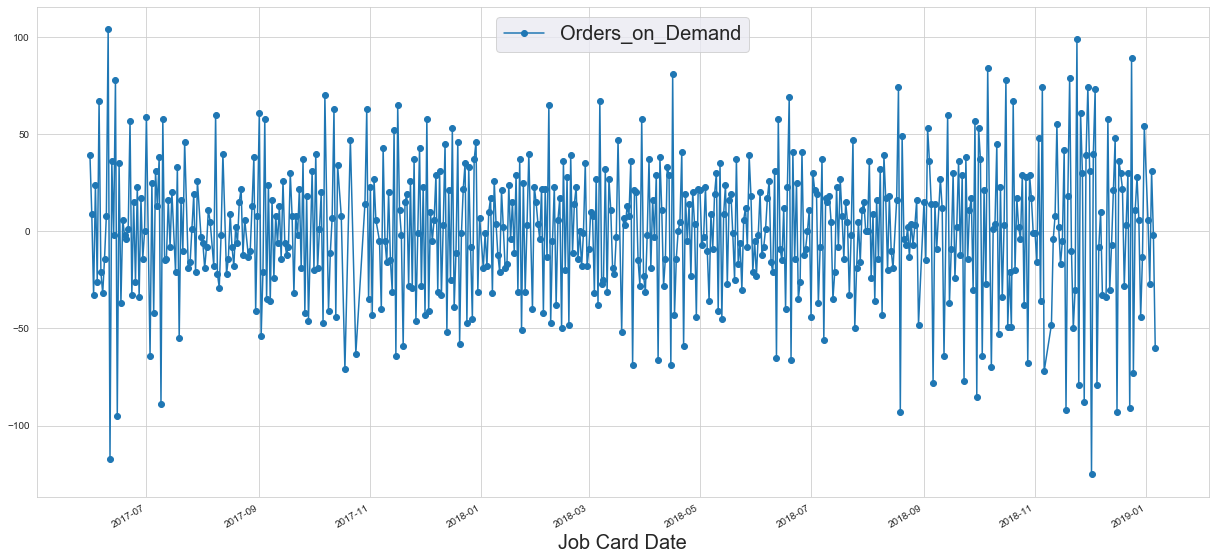

In [53]:
data_diff.plot(figsize=(21,10),marker='o')
sns.set_style("darkgrid")
plt.legend(loc='upper center',frameon=True, labelspacing=1,fontsize=20)
plt.xlabel(xlabel='Job Card Date',fontdict={'fontsize':20})

In [54]:
data_diff.shape

(552, 1)

In [55]:
# print(X)

In [56]:
# print(train)

In [57]:
# print(test)

# AutoRegressive(AR) Model 

In [58]:
X=data_diff.values
train=X[0:450]
test=X[451:]
predictions=[]

In [59]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()
print(model_ar_fit.aic) #  Akaike Information Criteria 

6.2134452127800115


In [60]:
predictions=model_ar_fit.predict(start=50,end=150)
predictions

array([ 2.25677722e+01, -2.27382271e+01, -1.17976164e+01,  1.77773602e+01,
        1.01755286e+01, -1.53541589e+01,  9.66555459e+00, -1.05247501e+01,
       -1.00889542e+01, -5.06617734e+00,  1.77419760e+01,  1.61603743e+01,
        4.02329085e+00,  4.68337837e+00,  2.69286361e+01, -4.10429047e+01,
       -1.87039684e+01,  1.59502109e+01,  1.82389705e+01, -3.15729318e+01,
        4.89185386e-01,  2.02558876e+01,  1.02964947e+00,  5.05380527e+00,
        2.48813078e+01,  2.54439394e+01,  2.45517740e+01,  5.19487069e+00,
       -5.92422934e+00,  4.13108501e+00, -1.07538046e+01,  6.28168115e+00,
        2.22983659e+01,  1.57400671e+00, -3.92357663e+01,  1.20554079e+01,
        1.11674301e+00, -6.79947775e+01, -5.01257905e+00,  1.71429747e+01,
       -4.36684825e+01, -5.37910149e+00, -2.53334489e+01,  1.52940587e+01,
       -9.84664969e+00,  1.69066430e+01,  1.18786003e+01,  2.11734346e+01,
       -5.32115943e-01,  1.36794294e+01,  1.84006592e+00, -5.32615396e+00,
        4.51145588e+00,  

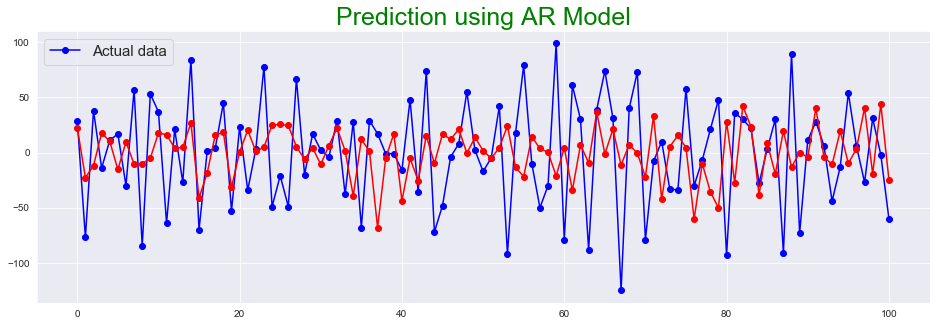

In [61]:
plt.figure(figsize=(16,5))
sns.set_style("darkgrid")
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using AR Model',fontdict={'fontsize':25},color='green')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.show()

In [62]:
mean_squared_error(test,predictions)

2875.9142540221455

In [63]:
np.sqrt(mean_squared_error(test,predictions))

53.62755125886456

# Moving Average(MA) Model

In [64]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
model_ma=ARMA(train,order=(0, 1))
model_ma_fit=model_ma.fit()
print(model_ma_fit.aic) #  Akaike Information Criteria 

4084.2919447482423


In [65]:
predictions=model_ar_fit.predict(start=50,end=150)
predictions

array([ 2.25677722e+01, -2.27382271e+01, -1.17976164e+01,  1.77773602e+01,
        1.01755286e+01, -1.53541589e+01,  9.66555459e+00, -1.05247501e+01,
       -1.00889542e+01, -5.06617734e+00,  1.77419760e+01,  1.61603743e+01,
        4.02329085e+00,  4.68337837e+00,  2.69286361e+01, -4.10429047e+01,
       -1.87039684e+01,  1.59502109e+01,  1.82389705e+01, -3.15729318e+01,
        4.89185386e-01,  2.02558876e+01,  1.02964947e+00,  5.05380527e+00,
        2.48813078e+01,  2.54439394e+01,  2.45517740e+01,  5.19487069e+00,
       -5.92422934e+00,  4.13108501e+00, -1.07538046e+01,  6.28168115e+00,
        2.22983659e+01,  1.57400671e+00, -3.92357663e+01,  1.20554079e+01,
        1.11674301e+00, -6.79947775e+01, -5.01257905e+00,  1.71429747e+01,
       -4.36684825e+01, -5.37910149e+00, -2.53334489e+01,  1.52940587e+01,
       -9.84664969e+00,  1.69066430e+01,  1.18786003e+01,  2.11734346e+01,
       -5.32115943e-01,  1.36794294e+01,  1.84006592e+00, -5.32615396e+00,
        4.51145588e+00,  

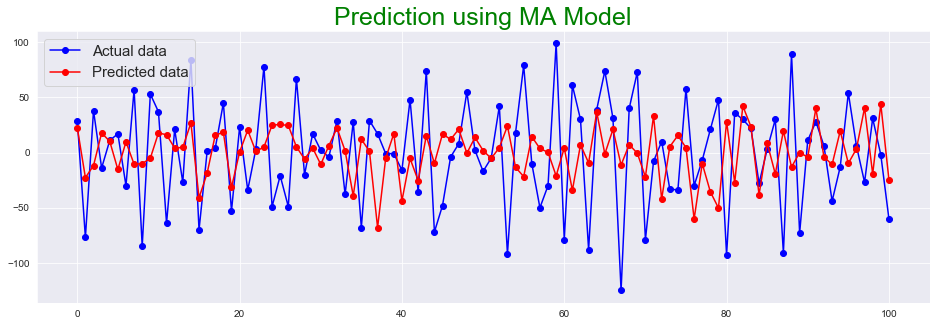

In [66]:
plt.figure(figsize=(16,5))
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using MA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [67]:
mean_squared_error(test,predictions)

2875.9142540221455

In [68]:
np.sqrt(mean_squared_error(test,predictions))

53.62755125886456

# Auto Regressive Moving Average(ARMA) Model

In [69]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
model_arma=ARMA(train,order=(1,1))
model_arma_fit=model_arma.fit()
print(model_arma_fit.aic) #  Akaike Information Criteria 

4083.644407974384


In [70]:
predictions=model_arma_fit.predict(start=50,end=150)
predictions

array([ 23.3157492 , -25.34883137,  -4.33744733,  12.4820244 ,
        10.86576097,  -9.26200391,  12.97983145, -14.4901312 ,
       -10.573828  ,  -3.76115947,  16.13026352,  23.62605365,
        11.10232235,   5.42667057,  23.81017945, -39.35365797,
       -14.51977623,  16.26253774,  17.55351192, -24.62160895,
        -0.54996533,  14.0105381 ,   4.05165629,  12.17438605,
        30.21082417,  26.64823003,  31.53667183,  14.47210174,
        -8.94420337,   3.98369209,  -2.35691165,  11.26403725,
        21.08120897,   6.62373099, -32.92117364,  11.21318048,
         2.4323571 , -60.66379031,  -1.66247912,  20.18972884,
       -40.7236585 ,  -2.38651629, -26.99894841,  11.66267009,
        -5.40839498,  19.73750365,  10.51642326,  16.23895614,
         2.03166987,  16.45949994, -11.19315081,  -4.34933746,
         8.3413044 ,  16.24296994, -15.53203973, -22.93150962,
        11.38653493,   2.5967887 ,   4.59484905, -18.31150512,
         2.33393841, -35.9564158 ,   9.36817311,  -9.65

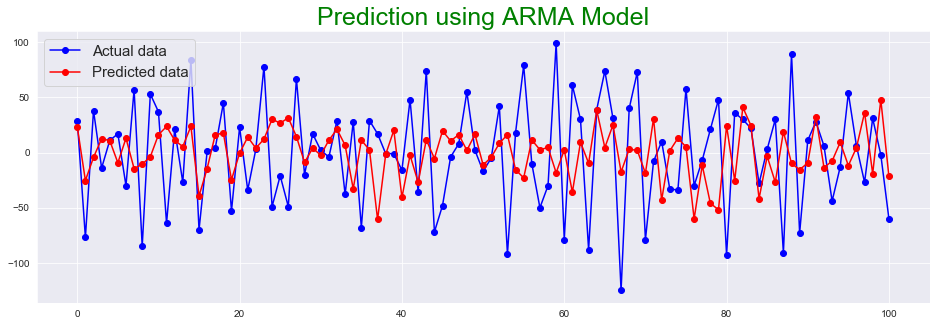

In [71]:
plt.figure(figsize=(16,5))
plt.plot(test,color='blue',label='Actual data',marker='o')
plt.plot(predictions,color='red',label="Predicted data",marker='o')
plt.legend(loc='upper left',frameon=True,fontsize=15)
plt.title('Prediction using ARMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [72]:
mean_squared_error(test,predictions)

2800.5750444201476

In [73]:
np.sqrt(mean_squared_error(test,predictions))

52.92045960136918

# Auto Regressive Integrated Moving Average (ARIMA) Model

In [74]:
X=data_diff.values
train=X[0:450]
test=X[451:]
predictions=[]

In [75]:
from statsmodels.tsa.arima_model import ARIMA

In [76]:
import warnings
warnings.filterwarnings('ignore')
# p - periods taken for autoregressive , d - integrated order of difference , q - periods in moving average
model_arima=ARIMA(train,order=(2,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic) #  Akaike Information Criteria 

4467.361143117485


In [77]:
predictions=model_arima_fit.predict(start=50,end=150)
predictions

array([  -8.35992376,  -46.41743805,   40.75104133,   29.76580203,
        -19.62557679,  -27.79126828,   33.42266967,  -29.73847893,
          7.00660824,   17.88966779,   15.34269097,   -5.12458831,
        -25.81191258,   -3.26597012,   27.50603259,  -71.35068111,
         47.68218313,   49.03067668,  -25.19463773,  -58.40359477,
         44.66009901,   22.92325268,  -28.54678931,    6.41076343,
         19.25174865,  -16.22377148,   -1.64490557,  -18.30243465,
        -18.11453473,   32.6174949 ,   -1.92139793,   11.07534214,
          6.43219347,  -26.01052751,  -38.28389162,   71.37408284,
        -12.0839538 ,  -81.26888967,   95.48072109,   23.20366641,
       -100.82097171,   58.88067376,  -15.6240053 ,   33.90849198,
        -24.914224  ,   16.17608943,  -13.77610212,   -1.34698317,
        -13.13060358,   19.08135741,  -28.88365043,   13.74985012,
         22.60390023,   -1.22624566,  -42.48015668,    4.1227703 ,
         53.71276406,  -22.28936975,   -9.66163586,  -20.48040

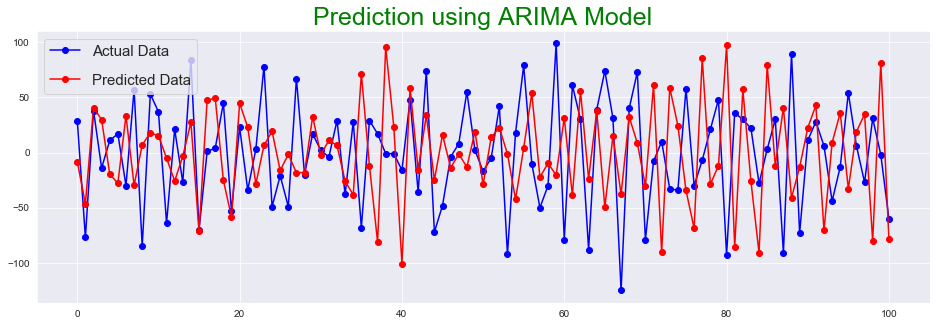

In [78]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using ARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [79]:
mean_squared_error(test,predictions)

4262.032154054787

In [80]:
np.sqrt(mean_squared_error(test,predictions))

65.28424123825586

In [81]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [82]:
import warnings
warnings.filterwarnings('ignore')
for a in pdq:
    try:
        model_arima=ARIMA(train,order=a)
        model_arima_fit=model_arima.fit()
        print(a,model_arima_fit.aic)
        print(model_fit.summary())

    except:
        continue

(0, 0, 0) 4404.339512754781
(0, 0, 1) 4084.2919447482423
(0, 1, 0) 4904.6525983939655
(0, 1, 1) 4403.66920178956
(0, 2, 0) 5444.125871435755
(0, 2, 1) 4902.832382283021
(1, 0, 0) 4238.512215260635
(1, 0, 1) 4083.644407974384
(1, 0, 2) 4084.971564536996
(1, 0, 3) 4083.5756350711945
(1, 0, 4) 4085.247906405827
(1, 1, 0) 4598.102109987465
(1, 2, 0) 5028.594992116832
(2, 0, 0) 4186.910938866989
(2, 0, 1) 4084.7662337396773
(2, 0, 2) 4083.364127596322
(2, 0, 3) 4078.1578139905164
(2, 0, 4) 4078.812311478272
(2, 1, 0) 4467.361143117485
(2, 2, 0) 4830.0481060895845
(2, 2, 4) 4118.010805740919
(3, 0, 0) 4157.312351369057
(3, 0, 1) 4086.5957888078483
(3, 0, 2) 4088.391046234603
(3, 0, 3) 4083.128302936752
(3, 0, 4) 4079.397689556262
(3, 1, 0) 4377.671213916378
(3, 2, 0) 4684.776328764964
(3, 2, 4) 4129.072479631913
(4, 0, 0) 4147.5177359835625
(4, 0, 1) 4088.343660171677
(4, 0, 2) 4087.186288578724
(4, 0, 3) 4089.129794470515
(4, 0, 4) 4086.2405703541835
(4, 1, 0) 4330.8257544804865
(4, 2, 0) 4

# Seasonal Autoregressive Integrated Moving Average (SARIMA) Model

In [83]:
X=data_diff.values
train=X[0:450]
test=X[451:]
predictions=[]

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [85]:
model_sarima = SARIMAX(test, order=(3,2,2), seasonal_order=(2,2,2,2))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.aic)

1031.1705693793494


In [86]:
predictions=model_sarima_fit.predict(start=50,end=150)
predictions

array([-56.82365941, -24.81240757,  18.92415934,  37.00751498,
        63.66280462,  38.71606457, -55.71798426, -33.08573028,
        11.78320755,  62.46627471, -46.22098056,  45.5308947 ,
       -23.42554591, -24.72277578,  28.31174154,  38.49820754,
        -6.38970256, -49.09911872,  83.59280514,  54.91850899,
       -24.5461829 ,  51.98376313,  25.26008588,   4.27294211,
       -20.63147367,  35.78539721, -40.90856901, -53.03777499,
       -23.57153307, -16.14717919, -52.0076199 ,  39.80013103,
        21.15988097, -12.50030051, -34.98988013,  15.94352826,
        11.68999034,  -7.91415822,  70.79081693,  -7.94246926,
        16.83036898, -13.21408707, -24.62352077, -25.63132147,
        -9.87717496,  43.59950094, -40.90806157, -22.38683606,
         3.54964371, -16.22250355,   3.2426064 ,  45.8799644 ,
        22.68742743, -32.07585008,  -4.3265747 ,   6.09724233,
         9.72246653, -22.26851716,  31.10392618, -26.33681199,
         6.23366778,  -7.68364425,  21.59130169, -22.80

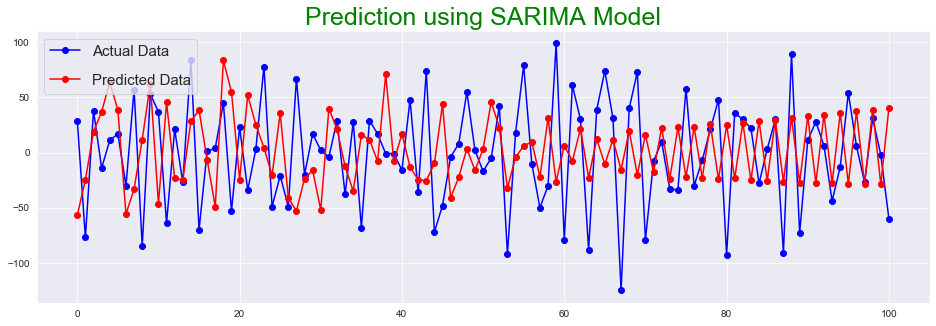

In [87]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using SARIMA Model',fontdict={'fontsize':25},color='green')
plt.show()

In [88]:
mean_squared_error(test,predictions)

3383.8378274169804

In [89]:
np.sqrt(mean_squared_error(test,predictions))

58.17076437023138

In [90]:
import itertools
p=d=q=s=range(0,2)
pdqs=list(itertools.product(p,d,q,s))
pdqs

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [91]:
import warnings
warnings.filterwarnings('ignore')
for a in pdqs:
    try:
        model_sarima=SARIMAX(train,order=a,seasonal_order=a)
        model_sarima_fit=model_sarima.fit()
        print(a,model_sarima_fit.aic)
        print(model_fit.summary())

    except:
        continue

(0, 0, 0, 0) 4402.357712533654
(0, 0, 0, 1) 4402.357712533654
(0, 0, 1, 0) 4122.884016181888
(0, 0, 1, 1) 4122.884016181888
(0, 1, 0, 1) 5442.126702927653
(0, 1, 1, 1) 4410.743349454146
(1, 0, 0, 0) 4210.953215040823
(1, 0, 0, 1) 4210.953215040823
(1, 0, 1, 0) 4099.795582955067
(1, 0, 1, 1) 4099.795582955067
(1, 1, 0, 1) 4897.213109572421
(1, 1, 1, 1) 4222.548128630118


# Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [92]:
X=data_diff.values
train=X[0:400]
test=X[401:]
predictions=[]

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [94]:
model_sarimax = SARIMAX(train,exdog=test,order=(3,2,2), seasonal_order=(1,1,1,1))
model_sarimax_fit = model_sarimax.fit()
print(model_sarimax_fit.aic)

3890.352813488303


In [95]:
predictions=model_sarimax_fit.predict(start=50,end=200)
predictions

array([ -8.98280498, -28.51460218,  24.23838295,  22.16637086,
         3.4394099 , -19.65609103,   3.94849644,   1.17038717,
         6.40706359,   9.02725693,  11.38236446,  -7.1930104 ,
       -21.5774435 ,  -7.36546078,   7.32491444,  -9.02235463,
        18.36499349,  29.05173035,   3.39982723, -34.27051464,
         3.03246299,  21.70217201,  -3.39805451,  -9.52973722,
        -2.48980856,  -3.56092429, -14.51168482,  -9.33474536,
        -4.61747584,  21.08913702,  11.88863686,  12.8712629 ,
        -6.79605168,  -7.90216949, -18.79957   ,  30.45459334,
         9.42910657, -14.6212563 ,  18.91347231,  28.10482677,
       -26.3020949 ,  -4.81153547,   2.84478924,  28.24707342,
       -21.30759189,   4.94330027, -19.56906911,   0.25867923,
       -12.93638729,  10.4075154 ,  -7.44848058,  10.53565229,
         8.98115434,   8.099393  , -20.37905257,  -0.50829032,
        24.44461068,   6.65770234, -11.23888236, -15.7342661 ,
        15.02747033,  -3.12692106,  22.89216651,  -5.40

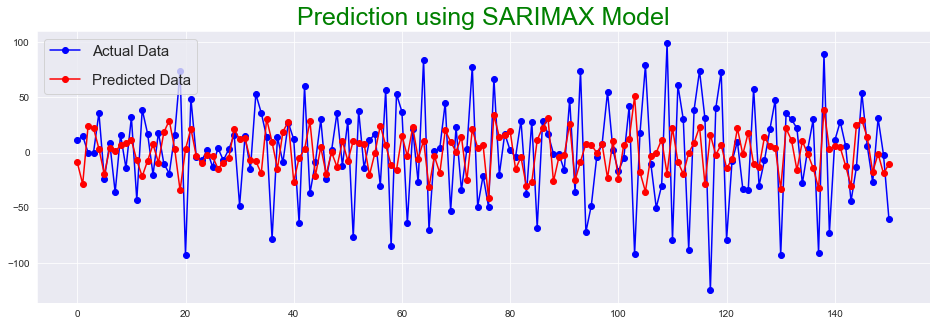

In [96]:
plt.figure(figsize=(16,5))
plt.plot(test,color='Blue',label='Actual Data',marker='o')
plt.plot(predictions, color='Red',label='Predicted Data',marker='o')
plt.legend(loc='upper left',frameon=True, labelspacing=1,fontsize=15)
plt.title('Prediction using SARIMAX Model',fontdict={'fontsize':25},color='green')
plt.show()

In [97]:
mean_squared_error(test,predictions)

2140.2451710357323

In [98]:
np.sqrt(mean_squared_error(test,predictions))

46.26278386603785

In [99]:
import itertools
p=d=q=s=range(0,2)
pdqs=list(itertools.product(p,d,q,s))
pdqs

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [100]:
import warnings
warnings.filterwarnings('ignore')
for a in pdqs:
    try:
        model_sarimax=SARIMAX(train,order=a,seasonal_order=a)
        model_sarimax_fit=model_sarimax.fit()
        print(a,model_sarimax_fit.aic)
        print(model_fit.summary())

    except:
        continue

(0, 0, 0, 0) 3911.4332236940672
(0, 0, 0, 1) 3911.4332236940672
(0, 0, 1, 0) 3646.247541904383
(0, 0, 1, 1) 3646.247541904383
(0, 1, 0, 1) 4836.367501951136
(0, 1, 1, 1) 3919.34594362218
(1, 0, 0, 0) 3734.8323208461497
(1, 0, 0, 1) 3734.8323208461497
(1, 0, 1, 0) 3624.504508345502
(1, 0, 1, 1) 3624.504508345502
(1, 1, 0, 1) 4351.040338162073
(1, 1, 1, 1) 3745.9755602021396
